In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("train.csv")
dftest = pd.read_csv('test.csv')

In [38]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
df.drop(columns=['PassengerId','Ticket'],axis=1,inplace=True)
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
724,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,53.1000,E8,S
395,0,3,"Johansson, Mr. Erik",male,22.0,0,0,7.7958,NaN,S
219,0,2,"Harris, Mr. Walter",male,30.0,0,0,10.5000,NaN,S
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,7.8958,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0000,NaN,S
309,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,56.9292,E36,C
224,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,90.0000,C93,S
444,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,8.1125,NaN,S
334,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,133.6500,NaN,S
553,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,7.2250,NaN,C


In [40]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df['Family'] = df['Parch'] + df['SibSp']
df.drop(columns=['Cabin','Parch','SibSp'],axis=1,inplace=True)
df.sample(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
664,1,3,"Lindqvist, Mr. Eino William",male,20.0,7.9250,S,1
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,9.2167,S,0
537,1,1,"LeRoy, Miss. Bertha",female,30.0,106.4250,C,0
587,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,79.2000,C,2
617,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,16.1000,S,1
719,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,7.7750,S,0
291,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,91.0792,C,1
206,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,15.8500,S,1
158,0,3,"Smiljanic, Mr. Mile",male,NaN,8.6625,S,0
529,0,2,"Hocking, Mr. Richard George",male,23.0,11.5000,S,3


In [42]:
def add_title(x):
    if "Mr." in x or "Don." in x:
        return "Mr."
    elif "Ms." in x or "Miss." in x:
        return "Miss."
    elif "Mrs." in x:
        return "Mrs."
    elif "Master" in x:
        return "Master"
    elif "Rev." in x:
        return "Rev."
    else:
        return ""

In [43]:
df['title'] = df['Name'].apply(add_title)
df.sample(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,title
182,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,31.3875,S,6,Master
395,0,3,"Johansson, Mr. Erik",male,22.0,7.7958,S,0,Mr.
802,1,1,"Carter, Master. William Thornton II",male,11.0,120.0000,S,3,Master
809,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,53.1000,S,1,Mrs.
738,0,3,"Ivanoff, Mr. Kanio",male,NaN,7.8958,S,0,Mr.
716,1,1,"Endres, Miss. Caroline Louise",female,38.0,227.5250,C,0,Miss.
409,0,3,"Lefebre, Miss. Ida",female,NaN,25.4667,S,4,Miss.
47,1,3,"O'Driscoll, Miss. Bridget",female,NaN,7.7500,Q,0,Miss.
374,0,3,"Palsson, Miss. Stina Viola",female,3.0,21.0750,S,4,Miss.
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,S,4,Mrs.


In [44]:
df.drop('Name',axis=1,inplace=True)
df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,title
227,0,3,male,20.5,7.2500,S,0,Mr.
344,0,2,male,36.0,13.0000,S,0,Mr.
88,1,1,female,23.0,263.0000,S,5,Miss.
709,1,3,male,NaN,15.2458,C,2,Master
388,0,3,male,NaN,7.7292,Q,0,Mr.
46,0,3,male,NaN,15.5000,Q,1,Mr.
446,1,2,female,13.0,19.5000,S,1,Miss.
6,0,1,male,54.0,51.8625,S,0,Mr.
701,1,1,male,35.0,26.2875,S,0,Mr.
618,1,2,female,4.0,39.0000,S,3,Miss.


In [45]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Family        0
title         0
dtype: int64

<Axes: xlabel='title', ylabel='Age'>

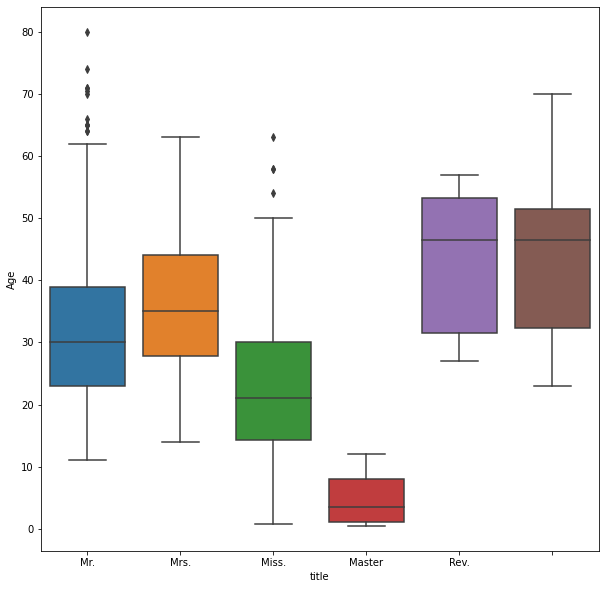

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='title',y='Age')

In [47]:
df['Age'] = df.groupby(['Pclass','title'])['Age'].transform(lambda x: x.fillna(round(x.mean(),0)))

<Axes: xlabel='Pclass', ylabel='count'>

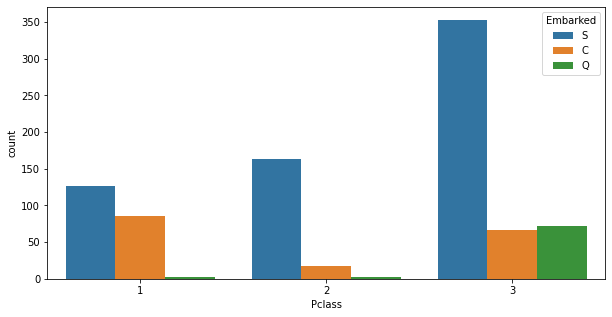

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Pclass',hue='Embarked')

In [49]:
from statistics import mode
df['Embarked'] = df['Embarked'].fillna(mode)

In [50]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
title       0
dtype: int64

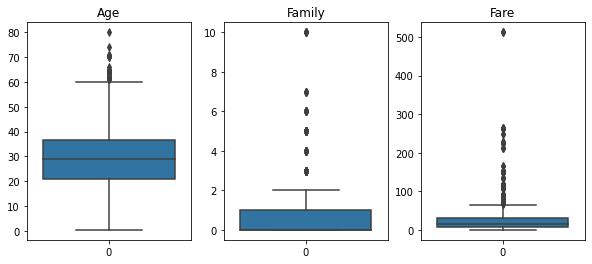

<Figure size 432x288 with 0 Axes>

In [51]:
names = ['Age','Family','Fare']
fig, axes = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    sns.boxplot(df[names[i]],ax=axes[i]).set_title(names[i])

plt.show()
plt.tight_layout()

In [52]:
df['Family'] = df['Family'].apply(lambda x: 'yes' if x>0 else 'no')

<Axes: xlabel='Family', ylabel='count'>

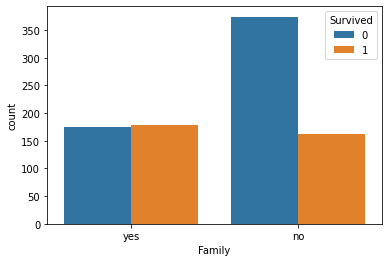

In [53]:
sns.countplot(df,x='Family',hue='Survived')

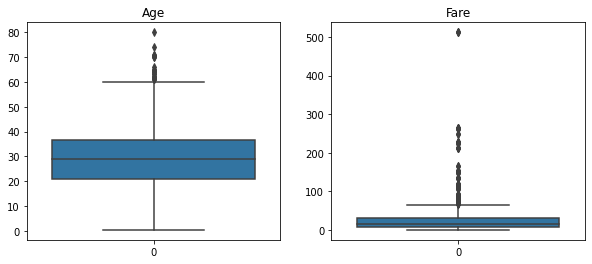

<Figure size 432x288 with 0 Axes>

In [54]:
names = ['Age','Fare']
fig,axes = plt.subplots(1,2,figsize=(10,4))
for i in range(2):
    sns.boxplot(df[names[i]],ax=axes[i]).set_title(names[i])

plt.show()
plt.tight_layout()

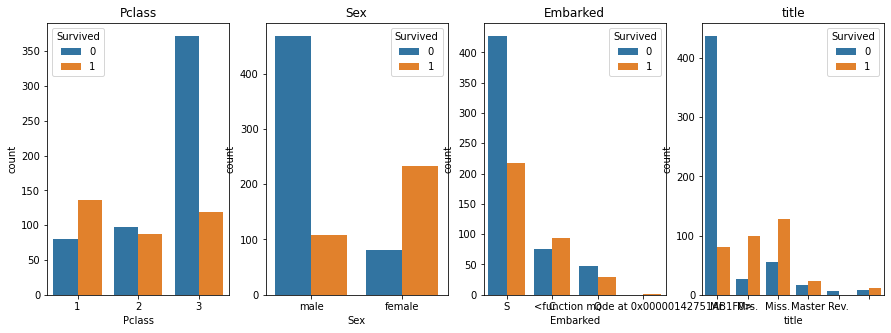

<Figure size 432x288 with 0 Axes>

In [55]:
names = ['Pclass','Sex','Embarked','title']
fig,axes = plt.subplots(1,4,figsize=(15,5))
for i in range(4):
    sns.countplot(x=df[names[i]],hue=df['Survived'],ax=axes[i]).set_title(names[i])

plt.show()
plt.tight_layout()

In [56]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_yes,title_Master,title_Miss.,title_Mr.,title_Mrs.,title_Rev.
0,0,3,22.0,7.2500,1,0,0,1,1,0,0,1,0,0
1,1,1,38.0,71.2833,0,1,0,0,1,0,0,0,1,0
2,1,3,26.0,7.9250,0,0,0,1,0,0,1,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,1,0,0,0,1,0
4,0,3,35.0,8.0500,1,0,0,1,0,0,0,1,0,0


<Axes: >

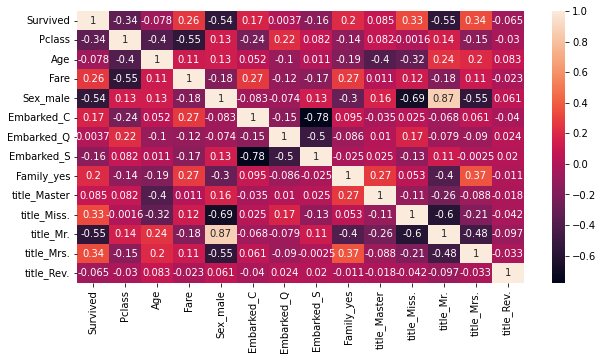

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [59]:
def compute_vif(cf):
    x = df[cf].copy()
    x['intercept'] = 1

    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [60]:
cf = ['Pclass', 'Family_yes', 'Fare', 'Sex_male', 'title_Mr.', 'title_Miss.', 'title_Mrs.']
compute_vif(cf).sort_values('VIF',ascending=False)

,Variable,VIF
3,Sex_male,38.406065
5,title_Miss.,25.594994
6,title_Mrs.,19.286078
4,title_Mr.,4.498353
2,Fare,1.549849
0,Pclass,1.485911
1,Family_yes,1.371021


In [61]:
df.drop('Sex_male',inplace=True, axis=1)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
y = df['Survived']
x = df.drop('Survived',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=17)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [65]:
ft = RandomForestClassifier(random_state=17)
tree = DecisionTreeClassifier(random_state=17)

fp = {
    'n_estimators' : [50,100,200,400],
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,5,10,15,20,25],
    'min_samples_leaf' : [2,4,6,8,10] 
}

tree_params = {  
                 'criterion' : ['gini', 'entropy'],
                 'max_depth' : [2,3,4,5,6,7,8,9,10],
                 'min_samples_split' : [2,5,10,15,20,25],
                 'min_samples_leaf' : [2,4,6,8,10]
              }

scoring = 'accuracy'

In [66]:
def select_best():
    tree_rscv = RandomizedSearchCV(tree,tree_params,cv=8,scoring=scoring,random_state=17)
    tree_rscv.fit(x_train,y_train)

    ft_rscv = RandomizedSearchCV(ft,fp,cv=8,scoring=scoring,random_state=17)
    ft_rscv.fit(x_train,y_train)

    tree_score = tree_rscv.best_score_
    ft_score = ft_rscv.best_score_

    if tree_score > ft_score:
        best = tree_rscv.best_estimator_
    else:
        best = ft_rscv.best_estimator_

    tree_score = 'Descision Tree Score ' + str(tree_score)
    ft_score = 'Random Forest Score ' + str(ft_score)

    return (tree_score,ft_score,best)

In [67]:
ts, fs, best_model = select_best()
print(ts,'\n',fs)

Descision Tree Score 0.8219979647218453 
 Random Forest Score 0.8330223880597015


In [68]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [69]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(x_test)

accuracy_score(y_test,y_pred)

0.803921568627451

In [122]:
dft = dftest.copy()

In [123]:
dft['title'] = dft['Name'].apply(add_title)

In [124]:
dft['Age'] = dft.groupby(['Pclass','title'])['Age'].transform(lambda x: x.fillna(np.round(x.mean(),0)))
dft['Fare'] = dft.groupby(['Pclass','title'])['Fare'].transform(lambda x:x.fillna(np.round(x.mean(),0)))

In [125]:
dft['Family'] = dft['Parch']+dft['SibSp']
dft['Family'] = dft['Family'].apply(lambda x: 'yes' if x>0 else 'no')
dft.drop(['Parch','SibSp'],axis=1,inplace=True)
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   title        418 non-null    object 
 10  Family       418 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 36.0+ KB


In [126]:
dft.drop(columns=['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
dft = pd.get_dummies(dft,drop_first=True)
dft[dft['title_Rev.']>0]

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,title_Master,title_Miss.,title_Mr.,title_Mrs.,title_Rev.,Family_yes
149,2,30.0,26.0,1,0,1,0,0,0,0,1,1
164,2,41.0,13.0,1,0,1,0,0,0,0,1,0


In [127]:
dft.drop('Sex_male',axis=1,inplace=True)
dft['Embarked_C'] = dft['Embarked_Q'] + dft['Embarked_S']
dft['Embarked_C'] = dft['Embarked_C'].apply(lambda x: 1 if x==0 else 0)
dft.head()

,Pclass,Age,Fare,Embarked_Q,Embarked_S,title_Master,title_Miss.,title_Mr.,title_Mrs.,title_Rev.,Family_yes,Embarked_C
0,3,34.5,7.8292,1,0,0,0,1,0,0,0,0
1,3,47.0,7.0000,0,1,0,0,0,1,0,1,0
2,2,62.0,9.6875,1,0,0,0,1,0,0,0,0
3,3,27.0,8.6625,0,1,0,0,1,0,0,0,0
4,3,22.0,12.2875,0,1,0,0,0,1,0,1,0


In [128]:
submit = best_model.predict(dft)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [130]:
dft = dft[['Pclass','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','Family_yes','title_Master','title_Miss.','title_Mr.','title_Mrs.','title_Rev.']]
dft

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_yes,title_Master,title_Miss.,title_Mr.,title_Mrs.,title_Rev.
0,3,34.5,7.8292,0,1,0,0,0,0,1,0,0
1,3,47.0,7.0000,0,0,1,1,0,0,0,1,0
2,2,62.0,9.6875,0,1,0,0,0,0,1,0,0
3,3,27.0,8.6625,0,0,1,0,0,0,1,0,0
4,3,22.0,12.2875,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,8.0500,0,0,1,0,0,0,1,0,0
414,1,39.0,108.9000,1,0,0,0,0,0,0,0,0
415,3,38.5,7.2500,0,0,1,0,0,0,1,0,0
416,3,27.0,8.0500,0,0,1,0,0,0,1,0,0


In [131]:
submit = best_model.predict(dft)

In [132]:
output = pd.DataFrame({'PassengerId' : dftest.PassengerId, 'Survived': submit})

In [133]:
output.to_csv('titanic.csv',index=False)